In [1]:
%config Completer.use_jedi = False

In [73]:
df = pd.read_csv('./datalab/VehicleDatasetFromCarDekho/train_data.csv')

<IPython.core.display.Javascript object>

In [74]:
df.columns = df.columns.map(lambda x : str(x).lower())

In [75]:
df.shape

(4340, 8)

In [88]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,14
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,14
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,9
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,4
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,7


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='selling_price'>

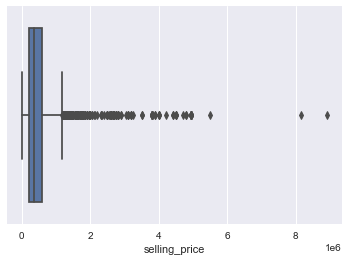

In [90]:
sns.boxplot(df.selling_price)

In [77]:
df.drop('name', axis=1, inplace=True)

In [78]:
df['age'] = 2021 - df.year

In [30]:
df.fuel.value_counts()

Diesel    2153
Petrol    2123
CNG         40
LPG         23
Name: fuel, dtype: int64

In [32]:
df.seller_type.value_counts()

Individual          3244
Dealer               993
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [41]:
df.transmission.value_counts()

1    3892
0     447
Name: transmission, dtype: int64

In [87]:
df.owner.value_counts()

First Owner             2832
Second Owner            1105
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [86]:
df.drop(index=4145, axis=0, inplace=True)

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
encoder = LabelEncoder()

In [39]:
df.transmission = encoder.fit_transform(df.transmission)

In [42]:
df = pd.get_dummies(df,columns=['owner', 'seller_type', 'fuel'],drop_first = True)

<IPython.core.display.Javascript object>

In [44]:
X = df.drop(['selling_price'], axis=1).values

In [54]:
Y = df['selling_price'].values

In [49]:
X

array([[-1.44576709,  0.08110896,  0.3388967 , ..., -0.99242326,
        -0.07300006,  1.02166821],
       [-1.44576709, -0.3476702 ,  0.3388967 , ..., -0.99242326,
        -0.07300006,  1.02166821],
       [-0.25923722,  0.72427769,  0.3388967 , ...,  1.00763458,
        -0.07300006, -0.97879134],
       ...,
       [-0.97115515,  0.35981541,  0.3388967 , ..., -0.99242326,
        -0.07300006,  1.02166821],
       [ 0.68998667,  0.50988812,  0.3388967 , ...,  1.00763458,
        -0.07300006, -0.97879134],
       [ 0.68998667, -0.56205978,  0.3388967 , ..., -0.99242326,
        -0.07300006,  1.02166821]])

In [47]:
scaler = StandardScaler()

<IPython.core.display.Javascript object>

In [48]:
X = scaler.fit_transform(X)

In [50]:
sc1 = StandardScaler()

<IPython.core.display.Javascript object>

In [56]:
Y = sc1.fit_transform(Y.reshape(-1, 1))

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

<IPython.core.display.Javascript object>

In [59]:
regressor = LinearRegression()
regressor = regressor.fit(X_train,y_train)

<IPython.core.display.Javascript object>

In [60]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[:50])

[[ 1.55e+00 -6.77e-02]
 [ 1.59e+00  1.86e+00]
 [-5.28e-01 -6.12e-01]
 [ 2.04e+00  7.68e+00]
 [ 1.21e+00 -1.11e-01]
 [-3.25e-01 -3.62e-01]
 [ 1.57e+00 -9.36e-02]
 [-3.11e-01 -5.43e-01]
 [-1.14e+00 -6.21e-01]
 [-7.10e-02 -3.53e-01]
 [-6.43e-01 -5.26e-01]
 [-4.98e-02 -1.80e-01]
 [-1.42e+00 -7.99e-01]
 [ 1.77e-01 -4.39e-01]
 [-7.90e-01 -5.26e-01]
 [-1.33e-01 -3.01e-01]
 [ 2.82e-02 -1.80e-01]
 [-9.68e-01 -6.38e-01]
 [-9.12e-01 -5.90e-01]
 [ 2.20e-01  2.17e-01]
 [-1.41e+00 -7.52e-01]
 [ 6.86e-02 -1.45e-01]
 [ 4.41e-02 -9.36e-02]
 [ 1.39e-02  4.25e-01]
 [ 1.26e-02 -4.57e-01]
 [ 5.29e-01  2.52e-01]
 [ 7.24e-02  1.87e-02]
 [ 2.05e-01  1.66e-01]
 [ 2.08e-02  1.66e-01]
 [-8.60e-02 -2.92e-01]
 [-1.60e-01 -1.80e-01]
 [-2.37e-02 -4.13e-01]
 [ 1.79e-02  9.43e-01]
 [ 3.87e-01  1.20e+00]
 [-1.05e-01 -4.48e-01]
 [-4.30e-01 -6.47e-01]
 [-2.91e-01 -7.45e-01]
 [-8.13e-01 -6.64e-01]
 [-2.22e-03 -4.05e-01]
 [-1.37e-01  7.92e-02]
 [-6.56e-01 -7.33e-01]
 [ 2.36e-01 -1.59e-02]
 [-6.76e-01 -6.12e-01]
 [ 1.58e+00

In [67]:
regressor = RandomForestRegressor(n_estimators=450, max_depth=14)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

<IPython.core.display.Javascript object>

In [62]:
from sklearn.metrics import r2_score

In [68]:
r2_score(y_test, y_pred)

0.7208875812314086

In [69]:
print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))

Mean squared error: 2.06


In [70]:
print('Variance score: %.2f' % regressor.score(X_test, y_test))

Variance score: 0.72
